In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

# 한글 깨짐 방지를 위해 폰트 지정
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
origin = pd.read_excel('C:/Users/sgvin/jump_goodwill.xlsx')

In [3]:
origin.head()

,id,address,store_type,level,area,goodwill,sale_price,contract_date
0,37579,경기남부 부천시 소사본동,카페,1층,85.95㎡,15000,20000,2022-06-05
1,37578,경기북부 파주시 동패동,치킨점,1층,82.65㎡,10000,14000,2022-06-05
2,37577,경기북부 구리시 갈매동,생선회/해물,3층,147.8334㎡,0,5000,2022-06-04
3,37576,경기남부 안산시 단원구 선부동,독서실,5층,297.52㎡,10000,15000,2022-06-04
4,37575,서울시 양천구 신월동,PC방,1층,187.07㎡,3200,4200,2022-06-04


# 서울시 상점 거래 데이터 생성

In [4]:
data = origin[origin['address'].apply(lambda x: str(x).split()[0]) == '서울시'].reset_index(drop = True)

In [5]:
#data.to_excel('서울시상점거래데이터.xlsx', index=False)

In [6]:
data

,id,address,store_type,level,area,goodwill,sale_price,contract_date
0,37575,서울시 양천구 신월동,PC방,1층,187.07㎡,3200,4200,2022-06-04
1,37574,서울시 마포구 도화동,네일아트,1층,29.75㎡,3000,6000,2022-06-04
2,37572,서울시 중랑구 면목동,치킨점,1층,42.98㎡,7000,8000,2022-06-04
3,37570,서울시 강남구 역삼동,카페,1층,99.17㎡,8000,13000,2022-06-03
4,37569,서울시 성북구 보문동7가,한식점,1층,181.82㎡,2000,4000,2022-06-03
...,...,...,...,...,...,...,...,...
17012,186,서울시 중랑구 면목동,미용실,2층,66㎡,3000,6000,2018-03-28
17013,185,서울시 마포구 서교동,기타음식점,지하1층,23㎡,1300,3300,2018-03-28
17014,183,서울시 강남구 역삼동,피부미용,3층,43㎡,3000,4000,2018-03-27
17015,182,서울시 광진구 자양동,한식점,지하1층,132㎡,3000,8000,2018-03-27


# 데이처 전처리

In [7]:
# 중복 데이터 삭제
data_1 = data.drop(columns='id').drop_duplicates()
data_1

,address,store_type,level,area,goodwill,sale_price,contract_date
0,서울시 양천구 신월동,PC방,1층,187.07㎡,3200,4200,2022-06-04
1,서울시 마포구 도화동,네일아트,1층,29.75㎡,3000,6000,2022-06-04
2,서울시 중랑구 면목동,치킨점,1층,42.98㎡,7000,8000,2022-06-04
3,서울시 강남구 역삼동,카페,1층,99.17㎡,8000,13000,2022-06-03
4,서울시 성북구 보문동7가,한식점,1층,181.82㎡,2000,4000,2022-06-03
...,...,...,...,...,...,...,...
17012,서울시 중랑구 면목동,미용실,2층,66㎡,3000,6000,2018-03-28
17013,서울시 마포구 서교동,기타음식점,지하1층,23㎡,1300,3300,2018-03-28
17014,서울시 강남구 역삼동,피부미용,3층,43㎡,3000,4000,2018-03-27
17015,서울시 광진구 자양동,한식점,지하1층,132㎡,3000,8000,2018-03-27


In [8]:
# 지하층층 삭제
data_2 = data_1[data_1['level']!='지하층층']

In [9]:
# 지하 1층, 2층 -> -1, -2로 변경
data_2['level'] = data_2['level'].str[:-1]
data_2['level'] = data_2['level'].replace('지하1',-1)
data_2['level'] = data_2['level'].replace('지하2',-2)
data_2['level'] = data_2['level'].replace('지하3',-3)
data_2['level'] = data_2['level'].astype(int)

C:\Users\sgvin\AppData\Local\Temp/ipykernel_56564/3347928209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['level'] = data_2['level'].str[:-1]
C:\Users\sgvin\AppData\Local\Temp/ipykernel_56564/3347928209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['level'] = data_2['level'].replace('지하1',-1)
C:\Users\sgvin\AppData\Local\Temp/ipykernel_56564/3347928209.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [10]:
# 변수 area 숫자형으로 변환
data_2['area']= data_2['area'].str[:-1].astype(float)

C:\Users\sgvin\AppData\Local\Temp/ipykernel_56564/3771543244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['area']= data_2['area'].str[:-1].astype(float)


In [11]:
# 100층 이상 및 0층 제거
data_2 = data_2[(data_2['level'] < 100) & (data_2['level'] != 0) ]

In [12]:
# address에 동이 없는 경우 삭제
data_2 = data_2[(data_2['address']!='서울시 성동구') & (data_2['address']!='서울시 구로구') ]
# 인덱스 재정렬
data_2 = data_2.reset_index(drop=True)

In [13]:
data_2

,address,store_type,level,area,goodwill,sale_price,contract_date
0,서울시 양천구 신월동,PC방,1,187.07,3200,4200,2022-06-04
1,서울시 마포구 도화동,네일아트,1,29.75,3000,6000,2022-06-04
2,서울시 중랑구 면목동,치킨점,1,42.98,7000,8000,2022-06-04
3,서울시 강남구 역삼동,카페,1,99.17,8000,13000,2022-06-03
4,서울시 성북구 보문동7가,한식점,1,181.82,2000,4000,2022-06-03
...,...,...,...,...,...,...,...
16327,서울시 중랑구 면목동,미용실,2,66.00,3000,6000,2018-03-28
16328,서울시 마포구 서교동,기타음식점,-1,23.00,1300,3300,2018-03-28
16329,서울시 강남구 역삼동,피부미용,3,43.00,3000,4000,2018-03-27
16330,서울시 광진구 자양동,한식점,-1,132.00,3000,8000,2018-03-27


In [14]:
# address의 동 추출
d_data = pd.DataFrame(data_2['address'].apply(lambda x: str(x).split()[-1]).unique())
# 동 데이터 엑셀로 저장
#d_data.to_excel('행정동.xlsx', index=False)

# 연도별 행정동별 대형점포 수

In [15]:
# 행정동, 계약연도 컬럼 생성
import datetime
data_2['address_d'] = data_2['address'].apply(lambda x: str(x).split()[2])
data_2['contract_year'] = data_2['contract_date'].dt.year
data_2

,address,store_type,level,area,goodwill,sale_price,contract_date,address_d,contract_year
0,서울시 양천구 신월동,PC방,1,187.07,3200,4200,2022-06-04,신월동,2022
1,서울시 마포구 도화동,네일아트,1,29.75,3000,6000,2022-06-04,도화동,2022
2,서울시 중랑구 면목동,치킨점,1,42.98,7000,8000,2022-06-04,면목동,2022
3,서울시 강남구 역삼동,카페,1,99.17,8000,13000,2022-06-03,역삼동,2022
4,서울시 성북구 보문동7가,한식점,1,181.82,2000,4000,2022-06-03,보문동7가,2022
...,...,...,...,...,...,...,...,...,...
16327,서울시 중랑구 면목동,미용실,2,66.00,3000,6000,2018-03-28,면목동,2018
16328,서울시 마포구 서교동,기타음식점,-1,23.00,1300,3300,2018-03-28,서교동,2018
16329,서울시 강남구 역삼동,피부미용,3,43.00,3000,4000,2018-03-27,역삼동,2018
16330,서울시 광진구 자양동,한식점,-1,132.00,3000,8000,2018-03-27,자양동,2018


In [16]:
bmart = pd.read_excel('서울시 대규모점포 인허가 정보_처리후.xlsx')
bmart

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,도로명주소,도로명우편번호,사업장명,최종수정일자,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(X),좌표정보(Y),점포구분명
0,3100000,1.998310e+18,19981231,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,서울특별시 노원구 한글비석로 396 (상계동),139748.0,상계역전종합상가,20220419184657,U,2021-12-03 22:01:00,쇼핑센터,206280.789904,462002.498988,NaN
1,3160000,2.020316e+18,20200626,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,서울특별시 구로구 구로중앙로 152 (구로동),8292.0,이랜드리테일 NC구로점,20220517090511,U,2021-12-04 23:09:00,백화점,189570.360930,444336.051330,NaN
2,3180000,1.991318e+18,19910501,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,NaN,NaN,롯데백화점 영등포점,20220414112546,U,2021-12-03 23:06:00,백화점,191741.345848,445970.307641,NaN
3,3080000,2.011308e+18,20110909,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,서울특별시 강북구 삼양로 247 (미아동),142100.0,롯데쇼핑(주) 롯데마트 삼양점,20220524143218,U,2021-12-04 22:06:00,복합쇼핑몰,201494.627294,458136.342274,NaN
4,3210000,2.005321e+18,20150922,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,서울특별시 서초구 신반포로 176 (반포동),NaN,신세계백화점 강남점,20220425170752,U,2021-12-03 22:07:00,백화점,200250.447805,444683.220506,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,3180000,2.009318e+18,19821215,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,서울특별시 영등포구 영중로 9 (영등포동4가 신세계백화점),150985.0,(주)신세계 타임스퀘어점,20220510085713,U,2021-12-04 23:02:00,백화점,191581.500266,446108.807193,NaN
234,3010000,2.012301e+18,19791227,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,서울특별시 중구 남대문로 81 (소공동),100721.0,롯데백화점 본점,20220510092251,U,2021-12-04 23:02:00,백화점,198259.653577,451392.198219,NaN
235,3010000,2.005301e+18,19731030,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,서울특별시 중구 남대문로 67 (남대문로2가),NaN,롯데쇼핑본점영플라자,20220510092239,U,2021-12-04 23:02:00,백화점,198315.532747,451248.141600,NaN
236,3040000,2.001304e+18,19980323,NaN,1,영업/정상,1,정상영업,NaN,NaN,...,서울특별시 광진구 광나루로56길 85 (구의동),143721.0,롯데쇼핑(주)롯데마트 강변점,20220512141108,U,2021-12-04 23:04:00,복합쇼핑몰,208394.416382,448165.280000,NaN


In [17]:
# 행정동별 
b_list= pd.DataFrame(bmart['지번주소'].apply(lambda x: str(x).split()[2]).value_counts())
b_list

,지번주소
천호동,12
구로동,12
미아동,9
길음동,6
독산동,6
...,...
진관내동,1
구산동,1
상계2동,1
화곡동,1


In [18]:
bmart = bmart.fillna(100000)

In [19]:
# 인허가 일자를 기준으로 5개의 데이터 프레임 설정
bmart2018 = bmart[bmart['인허가일자'] < 20180000]
bmart2019 = bmart[bmart['인허가일자'] < 20190000]
bmart2020 = bmart[bmart['인허가일자'] < 20200000]
bmart2021 = bmart[bmart['인허가일자'] < 20210000]
bmart2022 = bmart

In [ ]:
"""

영업조건: 폐업일자, 휴업일자가 모두 10000인 경우/ 휴업종료일자가 행당 년도에 존재하는 경우
휴업조건: 휴업일자가 100000 이상이고, 폐업일자가 해당년도 이상인 경우 
            +휴업시작일자가 해당년도 이하인 경우 & 휴업종료일자가 해당년도 이상인 경우
폐업조건: 폐업일자가 100000 이상이고, 해당년도 내에 있는 경우

"""

In [21]:
def state2018(x, y, z):
    if x == 100000 and y == 100000:
        return '영업/정상'
    elif x == 100000 or x > 20190000  :
        if  100000 < y < 20190000 and z > 20190000:
            return '휴업'
        else:
            return '영업/정상'
    else:
        return '폐업'
def state2019(x, y, z):
    if x == 100000 and y == 100000:
        return '영업/정상'
    elif x == 100000 or x > 20200000  :
        if  100000 < y < 20200000 and z > 20200000:
            return '휴업'
        else:
            return '영업/정상'
    else:
        return '폐업'
def state2020(x, y, z):
    if x == 100000 and y == 100000:
        return '영업/정상'
    elif x == 100000 or x > 20210000  :
        if  100000 < y < 20210000 and z > 20210000:
            return '휴업'
        else:
            return '영업/정상'
    else:
        return '폐업'
def state2021(x, y, z):
    if x == 100000 and y == 100000:
        return '영업/정상'
    elif x == 100000 or x > 20220000  :
        if  100000 < y < 20220000 and z > 20220000:
            return '휴업'
        else:
            return '영업/정상'
    else:
        return '폐업'

In [22]:
bmart2018['신영업상태명'] = bmart2018.apply(lambda x: state2018( x['폐업일자'], x['휴업시작일자'], x['휴업종료일자']), axis=1)
bmart2019['신영업상태명'] = bmart2019.apply(lambda x: state2019( x['폐업일자'], x['휴업시작일자'], x['휴업종료일자']), axis=1)
bmart2020['신영업상태명'] = bmart2020.apply(lambda x: state2020( x['폐업일자'], x['휴업시작일자'], x['휴업종료일자']), axis=1)
bmart2021['신영업상태명'] = bmart2021.apply(lambda x: state2021( x['폐업일자'], x['휴업시작일자'], x['휴업종료일자']), axis=1)

C:\Users\sgvin\AppData\Local\Temp/ipykernel_56564/597785124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmart2018['신영업상태명'] = bmart2018.apply(lambda x: state2018( x['폐업일자'], x['휴업시작일자'], x['휴업종료일자']), axis=1)
C:\Users\sgvin\AppData\Local\Temp/ipykernel_56564/597785124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmart2019['신영업상태명'] = bmart2019.apply(lambda x: state2019( x['폐업일자'], x['휴업시작일자'], x['휴업종료일자']), axis=1)
C:\Users\sgvin\AppData\Local\Temp/ipykernel_56564/597785124.py:3: SettingWithC

In [23]:
bmart2018_n = bmart2018[bmart2018['신영업상태명']=='영업/정상']
list_2018 = pd.DataFrame(bmart2018_n['지번주소'].apply(lambda x: str(x).split()[2]).value_counts()).rename(columns={'지번주소':'2018'})

bmart2019_n = bmart2018[bmart2019['신영업상태명']=='영업/정상']
list_2019 = pd.DataFrame(bmart2019_n['지번주소'].apply(lambda x: str(x).split()[2]).value_counts()).rename(columns={'지번주소':'2019'})

bmart2020_n = bmart2020[bmart2020['신영업상태명']=='영업/정상']
list_2020 = pd.DataFrame(bmart2020_n['지번주소'].apply(lambda x: str(x).split()[2]).value_counts()).rename(columns={'지번주소':'2020'})

bmart2021_n = bmart2021[bmart2021['신영업상태명']=='영업/정상']
list_2021 = pd.DataFrame(bmart2021_n['지번주소'].apply(lambda x: str(x).split()[2]).value_counts()).rename(columns={'지번주소':'2021'})

bmart2022_n = bmart2022[bmart2022['영업상태명']=='영업/정상']
list_2022 = pd.DataFrame(bmart2022_n['지번주소'].apply(lambda x: str(x).split()[2]).value_counts()).rename(columns={'지번주소':'2022'})

C:\Users\sgvin\AppData\Local\Temp/ipykernel_56564/1456864745.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bmart2019_n = bmart2018[bmart2019['신영업상태명']=='영업/정상']


In [24]:
# 행정동별 연도별 대형점포 개수, 결측치는 0으로 채움
l_mart = pd.merge(d_data, list_2018, how='outer', left_on=0, right_on=list_2018.index).fillna(0)
l_mart = pd.merge(l_mart, list_2019, how='outer', left_on=0, right_on=list_2019.index).fillna(0)
l_mart = pd.merge(l_mart, list_2020, how='outer', left_on=0, right_on=list_2020.index).fillna(0)
l_mart = pd.merge(l_mart, list_2021, how='outer', left_on=0, right_on=list_2021.index).fillna(0)
l_mart = pd.merge(l_mart, list_2022, how='outer', left_on=0, right_on=list_2022.index).fillna(0)

In [25]:
l_mart

,0,2018,2019,2020,2021,2022
0,신월동,0.0,0.0,0.0,0.0,0.0
1,도화동,0.0,0.0,0.0,0.0,0.0
2,면목동,1.0,1.0,1.0,1.0,1.0
3,역삼동,3.0,2.0,2.0,2.0,1.0
4,보문동7가,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
438,목1동,1.0,1.0,1.0,1.0,1.0
439,진관내동,1.0,1.0,1.0,1.0,1.0
440,삼각산동,1.0,1.0,0.0,0.0,0.0
441,수유1동,1.0,1.0,1.0,1.0,0.0


In [26]:
dd = pd.DataFrame(l_mart.set_index(0).stack())
dd

0
0            
신월동 2018  0.0
    2019  0.0
    2020  0.0
    2021  0.0
    2022  0.0
...       ...
송중동 2018  1.0
    2019  1.0
    2020  1.0
    2021  1.0
    2022  1.0

[2215 rows x 1 columns]

In [27]:
dd = pd.DataFrame(l_mart.set_index(0).stack())
#dd.to_excel('연도별 마트.xlsx')

In [28]:
# 엑셀에서 셀 분할
l_mart = pd.read_excel('연도별 마트.xlsx')
l_mart

,0,Unnamed: 1,0.1
0,신월동,2018,0
1,신월동,2019,0
2,신월동,2020,0
3,신월동,2021,0
4,신월동,2022,0
...,...,...,...
2210,송중동,2018,1
2211,송중동,2019,1
2212,송중동,2020,1
2213,송중동,2021,1


In [29]:
# 연도별 행정도별 대형점포수
data_3 = pd.merge(data_2,l_mart, how= 'left', left_on = ['address_d','contract_year'], right_on = [0,'Unnamed: 1'] ).drop([0,'Unnamed: 1'],axis=1)

In [30]:
data_3.rename(columns={'0.1':'bmart'}, inplace=True)
data_3

,address,store_type,level,area,goodwill,sale_price,contract_date,address_d,contract_year,bmart
0,서울시 양천구 신월동,PC방,1,187.07,3200,4200,2022-06-04,신월동,2022,0
1,서울시 마포구 도화동,네일아트,1,29.75,3000,6000,2022-06-04,도화동,2022,0
2,서울시 중랑구 면목동,치킨점,1,42.98,7000,8000,2022-06-04,면목동,2022,1
3,서울시 강남구 역삼동,카페,1,99.17,8000,13000,2022-06-03,역삼동,2022,1
4,서울시 성북구 보문동7가,한식점,1,181.82,2000,4000,2022-06-03,보문동7가,2022,0
...,...,...,...,...,...,...,...,...,...,...
16327,서울시 중랑구 면목동,미용실,2,66.00,3000,6000,2018-03-28,면목동,2018,1
16328,서울시 마포구 서교동,기타음식점,-1,23.00,1300,3300,2018-03-28,서교동,2018,1
16329,서울시 강남구 역삼동,피부미용,3,43.00,3000,4000,2018-03-27,역삼동,2018,3
16330,서울시 광진구 자양동,한식점,-1,132.00,3000,8000,2018-03-27,자양동,2018,2


## 상권구분 컬럼 추가

In [31]:
sr = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권영역).csv', encoding='cp949')
sr = sr[['상권_구분_코드_명', '행정동_코드']]
sr.head()

,상권_구분_코드_명,행정동_코드
0,골목상권,11545710
1,골목상권,11350611
2,골목상권,11545680
3,골목상권,11545690
4,골목상권,11710562


In [32]:
emd = pd.read_excel('행정동법정동매핑_20201001.xlsx')
emd = emd[['행정기관코드','법정동']]
emd['행정기관코드'] = emd['행정기관코드'].astype(str).str[:-2].astype(int)
emd.head()

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,행정기관코드,법정동
0,11000000,서울특별시
1,11110000,종로구
2,11110515,청운동
3,11110515,신교동
4,11110515,궁정동


In [33]:
# 상권구분코드명과 법정동 결합
sg  = pd.merge(sr, emd, how='inner', left_on='행정동_코드', right_on = '행정기관코드')[['상권_구분_코드_명', '법정동']]
sg

,상권_구분_코드_명,법정동
0,골목상권,시흥동
1,골목상권,시흥동
2,골목상권,시흥동
3,전통시장,시흥동
4,골목상권,하계동
...,...,...
3662,전통시장,응암동
3663,전통시장,신내동
3664,전통시장,신당동
3665,전통시장,이문동


In [34]:
# 행정동별 상권 개수
sg_2 = sg.reset_index().groupby(['법정동','상권_구분_코드_명']).count()
sg_2

index
법정동  상권_구분_코드_명       
가락동  골목상권            5
     발달상권            5
가리봉동 골목상권            2
     발달상권            1
     전통시장            1
...                ...
흑석동  골목상권            4
     전통시장            1
흥인동  골목상권            2
     발달상권            1
     전통시장           10

[1126 rows x 1 columns]

In [35]:
# 동별 상권구분코드명별 개수 데이터
sg_data  = pd.pivot_table(sg_2, index='법정동', columns='상권_구분_코드_명', values='index').fillna(0)
sg_data

상권_구분_코드_명,골목상권,관광특구,발달상권,전통시장
법정동,,,,
가락동,5.0,0.0,5.0,0.0
가리봉동,2.0,0.0,1.0,1.0
가산동,4.0,0.0,1.0,0.0
가양동,5.0,0.0,2.0,0.0
가회동,2.0,0.0,1.0,0.0
...,...,...,...,...
후암동,3.0,0.0,0.0,1.0
훈정동,1.0,1.0,6.0,5.0
휘경동,4.0,0.0,1.0,1.0


In [36]:
# 상권구분 추가
data_4 = pd.merge(data_3, sg_data, how='left', left_on='address_d', right_on = '법정동').fillna(0)

In [37]:
data_4

,address,store_type,level,area,goodwill,sale_price,contract_date,address_d,contract_year,bmart,골목상권,관광특구,발달상권,전통시장
0,서울시 양천구 신월동,PC방,1,187.07,3200,4200,2022-06-04,신월동,2022,0,16.0,0.0,0.0,7.0
1,서울시 마포구 도화동,네일아트,1,29.75,3000,6000,2022-06-04,도화동,2022,0,7.0,0.0,2.0,2.0
2,서울시 중랑구 면목동,치킨점,1,42.98,7000,8000,2022-06-04,면목동,2022,1,16.0,0.0,1.0,4.0
3,서울시 강남구 역삼동,카페,1,99.17,8000,13000,2022-06-03,역삼동,2022,1,9.0,0.0,7.0,2.0
4,서울시 성북구 보문동7가,한식점,1,181.82,2000,4000,2022-06-03,보문동7가,2022,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16327,서울시 중랑구 면목동,미용실,2,66.00,3000,6000,2018-03-28,면목동,2018,1,16.0,0.0,1.0,4.0
16328,서울시 마포구 서교동,기타음식점,-1,23.00,1300,3300,2018-03-28,서교동,2018,1,6.0,0.0,4.0,4.0
16329,서울시 강남구 역삼동,피부미용,3,43.00,3000,4000,2018-03-27,역삼동,2018,3,9.0,0.0,7.0,2.0
16330,서울시 광진구 자양동,한식점,-1,132.00,3000,8000,2018-03-27,자양동,2018,2,11.0,0.0,0.0,6.0


## 상권 변화

In [38]:
sc = pd.read_csv('서울시 우리마을가게 상권분석서비스(행정동별 상권변화지표).csv', encoding='cp949')
sc = sc[['상권_변화_지표', '행정동_코드']]
sc

,상권_변화_지표,행정동_코드
0,HL,11740700
1,HH,11740690
2,LL,11740685
3,HL,11740660
4,LL,11740650
...,...,...
13563,HH,11110560
13564,LH,11110550
13565,LH,11110540
13566,HH,11110530


In [ ]:
# 상권변화지표 : 상업공간의 변화를 생존한 사업체의 평균 영업기간과 폐업한 사업체의 평균 영업기간을 기준으로 4개 등급으로 나눈 지표
'''
LL : 도시재생 및 신규 개발 상권으로 창업 진출입시 세심한 주의가 필요한 상권(지역), 특정시점 사업체의 영업기간이 서울시 평균 생존영업기간보다 낮고, 서울시 평균 폐업영업기간보다 낮은 상권(지역)
LH : 경쟁력 있는 신규 창업 우위 상권(지역), 특정 시점 사업체의 영업기간이 서울시 평균 생존영업기간보다 낮고, 서울시 평균 폐업영업기간보다 높은 상권(지역)
HL : 경쟁력 있는 기존 업체 우위 상권(지역), 특정 시점 사업체의 영업기간이 서울시 평균 생존영업기간보다 높고, 서울시 평균 폐업영업기간보다 낮은 상권(지역)
HH : 창업 진출입시 세심한 주의 상권(지역), 특정 시점 사업체의 영업기간이 서울시 평균 생존영업기간보다 높고, 서울시 평균 폐업영업기간보다 높은 상권(지역)
'''


In [40]:
# 상권 지표 기준 경쟁력 있는 상권과 주의 상권 구분
sc_change_value = {'HL':1, 'LH':1, 'HH':0, 'LL':0}

In [41]:
sc.replace({'상권_변화_지표':sc_change_value}, inplace=True)

In [42]:
emd = pd.read_excel('행정동법정동매핑_20201001.xlsx')
emd = emd[['행정기관코드','법정동']]
emd['행정기관코드'] = emd['행정기관코드'].astype(str).str[:-2].astype(int)
emd.head()

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,행정기관코드,법정동
0,11000000,서울특별시
1,11110000,종로구
2,11110515,청운동
3,11110515,신교동
4,11110515,궁정동


In [43]:
# 상권구분코드명과 법정동 결합
sgchange  = pd.merge(sc, emd, how='inner', left_on='행정동_코드', right_on = '행정기관코드')[['상권_변화_지표', '법정동']]
sgchange

,상권_변화_지표,법정동
0,1,둔촌동
1,1,둔촌동
2,1,둔촌동
3,1,둔촌동
4,1,둔촌동
...,...,...
23419,1,통인동
23420,1,누상동
23421,1,누하동
23422,1,옥인동


In [44]:
# 행정동별 상권 개수
sgchange_2 = sgchange.reset_index().groupby(['법정동','상권_변화_지표']).count()
sgchange_2

index
법정동  상권_변화_지표       
가락동  0            74
     1            22
가리봉동 0             2
     1            30
가산동  0            32
...              ...
휘경동  1            44
흑석동  0            24
     1             8
흥인동  0            10
     1            22

[649 rows x 1 columns]

In [45]:
sgchange_3 = pd.pivot_table(sgchange_2, index='법정동', columns='상권_변화_지표', values='index').fillna(0)
sgchange_3

상권_변화_지표,0,1
법정동,,
가락동,74.0,22.0
가리봉동,2.0,30.0
가산동,32.0,0.0
가양동,77.0,51.0
가회동,11.0,21.0
...,...,...
후암동,11.0,21.0
훈정동,32.0,0.0
휘경동,20.0,44.0


In [46]:
sgchange_3['sg_change'] = sgchange_3[0]
for i in range (0, len(sgchange_3)):
    if sgchange_3[0][i]> sgchange_3[1][i]:
        sgchange_3['sg_change'][i] = 0
    else:
        sgchange_3['sg_change'][i] = 1

In [47]:
sgchange_3

상권_변화_지표,0,1,sg_change
법정동,,,
가락동,74.0,22.0,0.0
가리봉동,2.0,30.0,1.0
가산동,32.0,0.0,0.0
가양동,77.0,51.0,0.0
가회동,11.0,21.0,1.0
...,...,...,...
후암동,11.0,21.0,1.0
훈정동,32.0,0.0,0.0
휘경동,20.0,44.0,1.0


In [48]:
data_5 = pd.merge(data_4, sgchange_3, how='left', left_on='address_d', right_on = '법정동').fillna(0).drop([0,1],axis=1)

In [49]:
data_5

,address,store_type,level,area,goodwill,sale_price,contract_date,address_d,contract_year,bmart,골목상권,관광특구,발달상권,전통시장,sg_change
0,서울시 양천구 신월동,PC방,1,187.07,3200,4200,2022-06-04,신월동,2022,0,16.0,0.0,0.0,7.0,0.0
1,서울시 마포구 도화동,네일아트,1,29.75,3000,6000,2022-06-04,도화동,2022,0,7.0,0.0,2.0,2.0,0.0
2,서울시 중랑구 면목동,치킨점,1,42.98,7000,8000,2022-06-04,면목동,2022,1,16.0,0.0,1.0,4.0,0.0
3,서울시 강남구 역삼동,카페,1,99.17,8000,13000,2022-06-03,역삼동,2022,1,9.0,0.0,7.0,2.0,0.0
4,서울시 성북구 보문동7가,한식점,1,181.82,2000,4000,2022-06-03,보문동7가,2022,0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16327,서울시 중랑구 면목동,미용실,2,66.00,3000,6000,2018-03-28,면목동,2018,1,16.0,0.0,1.0,4.0,0.0
16328,서울시 마포구 서교동,기타음식점,-1,23.00,1300,3300,2018-03-28,서교동,2018,1,6.0,0.0,4.0,4.0,0.0
16329,서울시 강남구 역삼동,피부미용,3,43.00,3000,4000,2018-03-27,역삼동,2018,3,9.0,0.0,7.0,2.0,0.0
16330,서울시 광진구 자양동,한식점,-1,132.00,3000,8000,2018-03-27,자양동,2018,2,11.0,0.0,0.0,6.0,0.0


## 행정동별 지하철 개수 추가

In [50]:
subway = pd.read_csv('서울시상가거래지하철.csv')

In [51]:
subway = subway[subway['level'] != 0]

In [52]:
subway['contract_date'] = subway['contract_date'].astype(str)
data_5['contract_date'] = data_5['contract_date'].astype(str)

In [53]:
data_6 = pd.merge(data_5,subway, how='inner',  
                    left_on = ['store_type','level','area','goodwill','sale_price','contract_date','address_d'], 
                    right_on=['store_type','level','area','goodwill','sale_price','contract_date','dong'])[
    ['store_type','level', 'area', 'goodwill', 'sale_price', 'contract_date', 'si', 'gu', 'dong', 'contract_year', 'bmart', 
 '골목상권', '관광특구', '발달상권', '전통시장', 'subway','sg_change']]
data_6

,store_type,level,area,goodwill,sale_price,contract_date,si,gu,dong,contract_year,bmart,골목상권,관광특구,발달상권,전통시장,subway,sg_change
0,PC방,1,187.07,3200,4200,2022-06-04,서울시,양천구,신월동,2022,0,16.0,0.0,0.0,7.0,0.0,0.0
1,네일아트,1,29.75,3000,6000,2022-06-04,서울시,마포구,도화동,2022,0,7.0,0.0,2.0,2.0,4.0,0.0
2,치킨점,1,42.98,7000,8000,2022-06-04,서울시,중랑구,면목동,2022,1,16.0,0.0,1.0,4.0,3.0,0.0
3,카페,1,99.17,8000,13000,2022-06-03,서울시,강남구,역삼동,2022,1,9.0,0.0,7.0,2.0,7.0,0.0
4,한식점,1,181.82,2000,4000,2022-06-03,서울시,성북구,보문동7가,2022,0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16327,미용실,2,66.00,3000,6000,2018-03-28,서울시,중랑구,면목동,2018,1,16.0,0.0,1.0,4.0,3.0,0.0
16328,기타음식점,-1,23.00,1300,3300,2018-03-28,서울시,마포구,서교동,2018,1,6.0,0.0,4.0,4.0,1.0,0.0
16329,피부미용,3,43.00,3000,4000,2018-03-27,서울시,강남구,역삼동,2018,3,9.0,0.0,7.0,2.0,7.0,0.0
16330,한식점,-1,132.00,3000,8000,2018-03-27,서울시,광진구,자양동,2018,2,11.0,0.0,0.0,6.0,3.0,0.0


## 구별 대학교 개수 추가

In [54]:
univ = pd.read_csv('서울시 대학 및 전문대학 DB 정보 (한국어).csv',encoding='cp949')

In [55]:
univ = pd.DataFrame(univ.groupby('행정구').count()['학교명'])
univ

,학교명
행정구,
강남구,1
강북구,1
강서구,2
관악구,1
광진구,3
구로구,3
노원구,7
도봉구,1
동대문구,5


In [56]:
data_7 = pd.merge(data_6, univ, how='left', left_on='gu', right_on = '행정구').fillna(0)
data_7

,store_type,level,area,goodwill,sale_price,contract_date,si,gu,dong,contract_year,bmart,골목상권,관광특구,발달상권,전통시장,subway,sg_change,학교명
0,PC방,1,187.07,3200,4200,2022-06-04,서울시,양천구,신월동,2022,0,16.0,0.0,0.0,7.0,0.0,0.0,0.0
1,네일아트,1,29.75,3000,6000,2022-06-04,서울시,마포구,도화동,2022,0,7.0,0.0,2.0,2.0,4.0,0.0,3.0
2,치킨점,1,42.98,7000,8000,2022-06-04,서울시,중랑구,면목동,2022,1,16.0,0.0,1.0,4.0,3.0,0.0,1.0
3,카페,1,99.17,8000,13000,2022-06-03,서울시,강남구,역삼동,2022,1,9.0,0.0,7.0,2.0,7.0,0.0,1.0
4,한식점,1,181.82,2000,4000,2022-06-03,서울시,성북구,보문동7가,2022,0,1.0,0.0,0.0,0.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16327,미용실,2,66.00,3000,6000,2018-03-28,서울시,중랑구,면목동,2018,1,16.0,0.0,1.0,4.0,3.0,0.0,1.0
16328,기타음식점,-1,23.00,1300,3300,2018-03-28,서울시,마포구,서교동,2018,1,6.0,0.0,4.0,4.0,1.0,0.0,3.0
16329,피부미용,3,43.00,3000,4000,2018-03-27,서울시,강남구,역삼동,2018,3,9.0,0.0,7.0,2.0,7.0,0.0,1.0
16330,한식점,-1,132.00,3000,8000,2018-03-27,서울시,광진구,자양동,2018,2,11.0,0.0,0.0,6.0,3.0,0.0,3.0


In [57]:
#data_6.to_excel('서울시상점거래데이터0629.xlsx')

## store_type 정리

In [58]:
cafe = ['카페', '커피점', '제과점']
food = ['한식점', '고깃집', '치킨점', '기타음식점', '중국집', '일식점', '생선회/해물', '레스토랑',
       '돈까스/우동', '피자점', '패스트푸드', '떡볶이/튀김', '꼬치구이','분식점']
beer = ['맥주호프점', '실내포차', '바', '노래주점', '이자카야', '기타주점']
acomo = ['고시원', '모텔', '펜션']
libr = ['학원', '독서실']
health = ['미용실', '네일아트', '피부미용', '요가/필라테스', '헬스클럽', '마사지', '스크린골프장','화장품점', '골프연습장']
fun = ['노래방', '당구장', 'PC방', '기타오락스포츠', '키즈카페', '만화방']
life =  ['편의점', '슈퍼마켓', '아이스크림 할인점', '아이스크림점', '문구팬시', '의류판매점']
conv = ['병원/약국', '이동통신점', '기타휴게점',  '세차장/카센타', '빨래방','사우나']
els = ['기타창업모음', '1층다용도', '기타판매점','다용도점포', '기타서비스업']

In [61]:
data_7['store_type_n'] =data_6['store_type']

In [62]:
for i in range(0, len(data_4['store_type'])):
    if data_7['store_type'][i] in cafe:
        data_7['store_type_n'][i] = '카페'
    elif data_7['store_type'][i] in food:
        data_7['store_type_n'][i] = '음식점'
    elif data_7['store_type'][i] in beer:
        data_7['store_type_n'][i] = '주점'
    elif data_7['store_type'][i] in acomo:
        data_7['store_type_n'][i] = '숙박업'
    elif data_7['store_type'][i] in libr:
        data_7['store_type_n'][i] = '학원_독서실'
    elif data_7['store_type'][i] in health:
        data_7['store_type_n'][i] = '미용_헬스'
    elif data_7['store_type'][i] in fun:
        data_7['store_type_n'][i] = '여가'
    elif data_7['store_type'][i] in life:
        data_7['store_type_n'][i] = '생활시설'
    elif data_7['store_type'][i] in conv:
        data_7['store_type_n'][i] = '편의시설'
    elif data_7['store_type'][i] in els:
        data_7['store_type_n'][i] = '기타'

C:\Users\sgvin\AppData\Local\Temp/ipykernel_56564/4008706907.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_7['store_type_n'][i] = '여가'
C:\Users\sgvin\AppData\Local\Temp/ipykernel_56564/4008706907.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_7['store_type_n'][i] = '미용_헬스'
C:\Users\sgvin\AppData\Local\Temp/ipykernel_56564/4008706907.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_7['store_type_n'][i] = '

In [63]:
data_7

,store_type,level,area,goodwill,sale_price,contract_date,si,gu,dong,contract_year,bmart,골목상권,관광특구,발달상권,전통시장,subway,sg_change,학교명,store_type_n
0,PC방,1,187.07,3200,4200,2022-06-04,서울시,양천구,신월동,2022,0,16.0,0.0,0.0,7.0,0.0,0.0,0.0,여가
1,네일아트,1,29.75,3000,6000,2022-06-04,서울시,마포구,도화동,2022,0,7.0,0.0,2.0,2.0,4.0,0.0,3.0,미용_헬스
2,치킨점,1,42.98,7000,8000,2022-06-04,서울시,중랑구,면목동,2022,1,16.0,0.0,1.0,4.0,3.0,0.0,1.0,음식점
3,카페,1,99.17,8000,13000,2022-06-03,서울시,강남구,역삼동,2022,1,9.0,0.0,7.0,2.0,7.0,0.0,1.0,카페
4,한식점,1,181.82,2000,4000,2022-06-03,서울시,성북구,보문동7가,2022,0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,음식점
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16327,미용실,2,66.00,3000,6000,2018-03-28,서울시,중랑구,면목동,2018,1,16.0,0.0,1.0,4.0,3.0,0.0,1.0,미용_헬스
16328,기타음식점,-1,23.00,1300,3300,2018-03-28,서울시,마포구,서교동,2018,1,6.0,0.0,4.0,4.0,1.0,0.0,3.0,음식점
16329,피부미용,3,43.00,3000,4000,2018-03-27,서울시,강남구,역삼동,2018,3,9.0,0.0,7.0,2.0,7.0,0.0,1.0,미용_헬스
16330,한식점,-1,132.00,3000,8000,2018-03-27,서울시,광진구,자양동,2018,2,11.0,0.0,0.0,6.0,3.0,0.0,3.0,음식점


In [64]:
data_7.drop('store_type',axis=1,inplace=True)

In [65]:
#data_7.to_excel('서울시상가거래데이터_0701.xlsx')

# 모델링

In [4]:
data_7 = pd.read_excel("C:/Users/sgvin/서울시상가거래데이터_0701.xlsx")
data_7

,Unnamed: 0,level,area,goodwill,sale_price,contract_date,si,gu,dong,contract_year,contract_month,bmart,골목상권,관광특구,발달상권,전통시장,subway,sg_change,학교명,store_type_n
0,0,1,187.07,3200,4200,2022-06-04,서울시,양천구,신월동,2022,6,0,16,0,0,7,0,0,0,여가
1,1,1,29.75,3000,6000,2022-06-04,서울시,마포구,도화동,2022,6,0,7,0,2,2,4,0,3,미용_헬스
2,2,1,42.98,7000,8000,2022-06-04,서울시,중랑구,면목동,2022,6,1,16,0,1,4,3,0,1,음식점
3,3,1,99.17,8000,13000,2022-06-03,서울시,강남구,역삼동,2022,6,1,9,0,7,2,7,0,1,카페
4,4,1,181.82,2000,4000,2022-06-03,서울시,성북구,보문동7가,2022,6,0,1,0,0,0,0,0,7,음식점
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16327,16327,2,66.00,3000,6000,2018-03-28,서울시,중랑구,면목동,2018,3,1,16,0,1,4,3,0,1,미용_헬스
16328,16328,-1,23.00,1300,3300,2018-03-28,서울시,마포구,서교동,2018,3,1,6,0,4,4,1,0,3,음식점
16329,16329,3,43.00,3000,4000,2018-03-27,서울시,강남구,역삼동,2018,3,3,9,0,7,2,7,0,1,미용_헬스
16330,16330,-1,132.00,3000,8000,2018-03-27,서울시,광진구,자양동,2018,3,2,11,0,0,6,3,0,3,음식점


## 라벨인코딩

In [5]:
data_7_t = data_7.drop(['Unnamed: 0','si','gu','dong','contract_date','contract_month'], axis = 1)

In [6]:
# 라벨인코딩: 계약연도
data_7_t['contract_year'] = data_7_t['contract_year'].replace(2018,1)
data_7_t['contract_year'] = data_7_t['contract_year'].replace(2019,2)
data_7_t['contract_year'] = data_7_t['contract_year'].replace(2020,3)
data_7_t['contract_year'] = data_7_t['contract_year'].replace(2021,4)
data_7_t['contract_year'] = data_7_t['contract_year'].replace(2022,5)

## Train, Test 분리

In [69]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [70]:
x_data = data_7_t.drop(['sale_price','sg_change','store_type_n'], axis = 1)
y_data = data_7_t['sg_change']

In [71]:
y_data.value_counts() 

0    13236
1     3096
Name: sg_change, dtype: int64

In [72]:
# train : test set = 7:3
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

## 정규화

In [73]:
x_train_t = x_train[x_train.columns]
x_train_tt = x_train[['area','goodwill']]

col_list = ['area','goodwill']

# 로버스트 정규화
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler()
transformer.fit(x_train_tt)
x_train_tt = transformer.transform(x_train_tt) 

x_train_t[col_list] = pd.DataFrame(x_train_tt,columns=['area','goodwill'], index=x_train_t.index)
x_train_t

# 테스트데이터 적용
x_test_t = x_test[x_test.columns]
x_test_tt = x_test_t[['area','goodwill']]
x_test_tt = transformer.transform(x_test_tt) 

x_test_t[col_list] = pd.DataFrame(x_test_tt,columns=['area','goodwill'], index=x_test_t.index)
x_test_t

,level,area,goodwill,contract_year,bmart,골목상권,관광특구,발달상권,전통시장,subway,학교명
14379,1,-0.347753,-0.5,2,0,5,0,0,1,3,1
13282,2,-0.403788,0.7,2,1,8,0,1,1,2,3
15359,1,-0.370503,-0.5,1,5,4,0,1,0,3,0
1683,-1,1.608988,0.6,4,2,9,0,7,2,7,1
10038,-1,-0.553962,-0.6,3,0,0,0,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5155,1,-0.703911,-0.6,4,0,5,0,2,3,0,9
5375,2,0.148269,0.8,4,8,14,0,2,5,5,1
13539,1,3.115208,0.2,2,2,4,0,1,2,5,2
9622,1,0.437185,-0.7,3,0,5,0,1,1,1,0


## VIF 확인

In [74]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(X_train):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(X_train.values,i)
                        for i in range(x_train.shape[1])]
    vif['Feature'] = x_train.columns
    return vif

In [75]:
vif = VIF(x_train_t)
print(vif)

    VIF_Factor        Feature
0     1.677643          level
1     1.099450           area
2     1.136706       goodwill
3     3.918311  contract_year
4     1.535727          bmart
5     5.984519           골목상권
6     1.141525           관광특구
7     3.008433           발달상권
8     3.757728           전통시장
9     3.643117         subway
10    1.950465            학교명


## 모델링: SGD LR GBT

In [76]:
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

### SGD

In [77]:
from sklearn.linear_model import SGDClassifier

SGD = SGDClassifier(random_state=42)
SGD.fit(x_train_t, y_train)

y_predict = SGD.predict(x_test_t)

print(SGD.score(x_train_t, y_train))
print(SGD.score(x_test_t, y_test))

0.8268019594121764
0.813265306122449


In [78]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      3944
           1       0.59      0.15      0.24       956

    accuracy                           0.81      4900
   macro avg       0.71      0.56      0.56      4900
weighted avg       0.78      0.81      0.77      4900



### LR

In [79]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(x_train_t, y_train)

y_predict = lr.predict(x_test_t)

print(lr.score(x_train_t, y_train))
print(lr.score(x_test_t, y_test))

0.8120188943317005
0.8028571428571428


In [80]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      3944
           1       0.48      0.11      0.18       956

    accuracy                           0.80      4900
   macro avg       0.65      0.54      0.53      4900
weighted avg       0.75      0.80      0.75      4900



### GradientBoosting

In [81]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train_t,y_train)

y_predict = gb.predict(x_test_t)

print(gb.score(x_train_t, y_train))
print(gb.score(x_test_t, y_test))

0.9432295311406578
0.9353061224489796


In [82]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3944
           1       0.95      0.70      0.81       956

    accuracy                           0.94      4900
   macro avg       0.94      0.85      0.89      4900
weighted avg       0.94      0.94      0.93      4900



#### 최적화

In [83]:
params = {'min_impurity_decrease': uniform(0.001,0.01),
          'max_depth': randint(2,5)
          }

In [84]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), params,
                        n_iter=10, n_jobs=-1, cv=10, random_state=42, scoring='accuracy', verbose=1)
gs.fit(x_train_t, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000188932DB250>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018890089BB0>},
                   random_state=42, scoring='accuracy', verbose=1)

In [85]:
print(gs.best_params_)

{'max_depth': 4, 'min_impurity_decrease': 0.00896542986860233}


In [86]:
print(np.max(gs.cv_results_['mean_test_score']))

0.9721840604714622


In [87]:
gbs = gs.best_estimator_
print(gbs.score(x_test_t, y_test))

0.963469387755102


In [88]:
predt = gbs.predict(x_test_t)
pd.DataFrame(classification_report(y_test, predt.round(), output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.964242,0.959763,0.963469,0.962002,0.963368
recall,0.991379,0.848326,0.963469,0.919853,0.963469
f1-score,0.977622,0.900611,0.963469,0.939116,0.962597
support,3944.000000,956.000000,0.963469,4900.000000,4900.000000


In [89]:
confusion_matrix(y_test, predt)

array([[3910,   34],
       [ 145,  811]], dtype=int64)

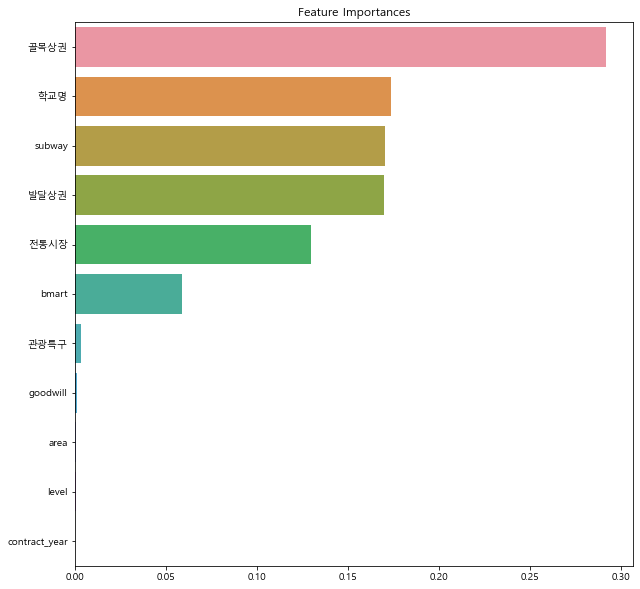

In [90]:
gb_importances_values = gbs.feature_importances_
gb_importances = pd.Series(gb_importances_values, index =x_train_t.columns)
gb_top = gb_importances.sort_values(ascending=False)
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
sns.barplot(x=gb_top, y=gb_top.index)
plt.show()

In [91]:
gb_top

골목상권             0.291898
학교명              0.173402
subway           0.170373
발달상권             0.169588
전통시장             0.129917
bmart            0.058877
관광특구             0.003491
goodwill         0.000967
area             0.000804
level            0.000499
contract_year    0.000184
dtype: float64

## 상권 흥망성쇠 해석

In [92]:
gbt_predict = pd.DataFrame(y_predict,index = y_test.index)
gbt_predict.rename(columns = {0:'gbt_predict'}, inplace=True)
gbt_predict

,gbt_predict
14379,0
13282,1
15359,0
1683,0
10038,0
...,...
5155,1
5375,0
13539,1
9622,0


In [93]:
clf_final = pd.merge(gbt_predict, data_7, left_index=True, right_index=True, how='left')

In [94]:
clf_final.drop('Unnamed: 0', axis = 1, inplace = True)
clf_final

,gbt_predict,level,area,goodwill,sale_price,contract_date,si,gu,dong,contract_year,contract_month,bmart,골목상권,관광특구,발달상권,전통시장,subway,sg_change,학교명,store_type_n
14379,0,1,45.00,1500,3000,2019-02-27,서울시,강북구,우이동,2019,2,0,5,0,0,1,3,0,1,주점
13282,1,2,40.00,7500,8500,2019-05-31,서울시,마포구,성산동,2019,5,1,8,0,1,1,2,1,3,카페
15359,0,1,42.97,1500,6500,2018-10-31,서울시,금천구,가산동,2018,10,5,4,0,1,0,3,0,0,음식점
1683,0,-1,219.60,7000,9500,2021-12-31,서울시,강남구,역삼동,2021,12,2,9,0,7,2,7,0,1,여가
10038,0,-1,26.60,1000,3500,2020-02-13,서울시,마포구,상암동,2020,2,0,0,0,1,1,2,0,3,음식점
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5155,1,1,13.22,1000,6000,2021-04-29,서울시,서대문구,대현동,2021,4,0,5,0,2,3,0,1,9,카페
5375,0,2,89.26,8000,11000,2021-04-15,서울시,강북구,미아동,2021,4,8,14,0,2,5,5,0,1,음식점
13539,1,1,354.00,5000,25000,2019-05-10,서울시,성동구,행당동,2019,5,2,4,0,1,2,5,1,2,카페
9622,0,1,115.04,500,3500,2020-03-23,서울시,강동구,암사동,2020,3,0,5,0,1,1,1,0,0,음식점


In [95]:
clf_final.groupby('dong').count()

,gbt_predict,level,area,goodwill,sale_price,contract_date,si,gu,contract_year,contract_month,bmart,골목상권,관광특구,발달상권,전통시장,subway,sg_change,학교명,store_type_n
dong,,,,,,,,,,,,,,,,,,,
가락동,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
가리봉동,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
가산동,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
가양동,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
갈월동,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
효창동,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
후암동,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
휘경동,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


In [96]:
clf_final_2 = clf_final.reset_index().groupby(['dong','gbt_predict']).count()
clf_final_2

,,index,level,area,goodwill,sale_price,contract_date,si,gu,contract_year,contract_month,bmart,골목상권,관광특구,발달상권,전통시장,subway,sg_change,학교명,store_type_n
dong,gbt_predict,,,,,,,,,,,,,,,,,,,
가락동,0,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
가리봉동,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
가산동,0,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
가양동,0,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
갈월동,0,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
효창동,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
후암동,0,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
휘경동,0,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


In [97]:
clf_final_3= pd.pivot_table(clf_final_2, index='dong', columns='gbt_predict', values='index').fillna(0)
clf_final_3

gbt_predict,0,1
dong,,
가락동,52.0,0.0
가리봉동,4.0,0.0
가산동,45.0,0.0
가양동,15.0,0.0
갈월동,5.0,0.0
...,...,...
효창동,3.0,0.0
후암동,9.0,0.0
휘경동,8.0,0.0


In [98]:
clf_final_3['상권'] = clf_final_3[0]
for i in range (0, len(clf_final_3)):
    if clf_final_3[0][i]> clf_final_3[1][i]:
        clf_final_3['상권'][i] = 0
    else:
        clf_final_3['상권'][i] = 1

# 권리금 예측 모델링

In [7]:
# 이상치 제거
data_7_t = data_7_t[(data_7_t['goodwill']<175000) & (data_7_t['goodwill']>=0)]
data_7_t

,level,area,goodwill,sale_price,contract_year,bmart,골목상권,관광특구,발달상권,전통시장,subway,sg_change,학교명,store_type_n
0,1,187.07,3200,4200,5,0,16,0,0,7,0,0,0,여가
1,1,29.75,3000,6000,5,0,7,0,2,2,4,0,3,미용_헬스
2,1,42.98,7000,8000,5,1,16,0,1,4,3,0,1,음식점
3,1,99.17,8000,13000,5,1,9,0,7,2,7,0,1,카페
4,1,181.82,2000,4000,5,0,1,0,0,0,0,0,7,음식점
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16327,2,66.00,3000,6000,1,1,16,0,1,4,3,0,1,미용_헬스
16328,-1,23.00,1300,3300,1,1,6,0,4,4,1,0,3,음식점
16329,3,43.00,3000,4000,1,3,9,0,7,2,7,0,1,미용_헬스
16330,-1,132.00,3000,8000,1,2,11,0,0,6,3,0,3,음식점


In [8]:
# 원핫인코딩
data_7_2 = pd.get_dummies(data_7_t, columns = ['store_type_n'])
data_7_2

,level,area,goodwill,sale_price,contract_year,bmart,골목상권,관광특구,발달상권,전통시장,...,store_type_n_기타,store_type_n_미용_헬스,store_type_n_생활시설,store_type_n_숙박업,store_type_n_여가,store_type_n_음식점,store_type_n_주점,store_type_n_카페,store_type_n_편의시설,store_type_n_학원_독서실
0,1,187.07,3200,4200,5,0,16,0,0,7,...,0,0,0,0,1,0,0,0,0,0
1,1,29.75,3000,6000,5,0,7,0,2,2,...,0,1,0,0,0,0,0,0,0,0
2,1,42.98,7000,8000,5,1,16,0,1,4,...,0,0,0,0,0,1,0,0,0,0
3,1,99.17,8000,13000,5,1,9,0,7,2,...,0,0,0,0,0,0,0,1,0,0
4,1,181.82,2000,4000,5,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16327,2,66.00,3000,6000,1,1,16,0,1,4,...,0,1,0,0,0,0,0,0,0,0
16328,-1,23.00,1300,3300,1,1,6,0,4,4,...,0,0,0,0,0,1,0,0,0,0
16329,3,43.00,3000,4000,1,3,9,0,7,2,...,0,1,0,0,0,0,0,0,0,0
16330,-1,132.00,3000,8000,1,2,11,0,0,6,...,0,0,0,0,0,1,0,0,0,0


## 정규화

In [9]:
data_7_2.describe()

,level,area,goodwill,sale_price,contract_year,bmart,골목상권,관광특구,발달상권,전통시장,...,store_type_n_기타,store_type_n_미용_헬스,store_type_n_생활시설,store_type_n_숙박업,store_type_n_여가,store_type_n_음식점,store_type_n_주점,store_type_n_카페,store_type_n_편의시설,store_type_n_학원_독서실
count,16330.000000,16330.000000,16330.000000,16330.000000,16330.000000,16330.000000,16330.000000,16330.000000,16330.000000,16330.000000,...,16330.000000,16330.000000,16330.000000,16330.000000,16330.000000,16330.000000,16330.000000,16330.000000,16330.000000,16330.000000
mean,1.213288,114.135306,5706.239804,9464.946724,3.048622,1.243601,8.324985,0.038824,2.407593,2.499081,...,0.047949,0.121249,0.034293,0.014023,0.092039,0.377097,0.099081,0.156889,0.025168,0.032211
std,1.402213,1023.524141,5995.794482,7927.006451,1.156804,1.961741,6.409946,0.193182,2.351904,2.776423,...,0.213664,0.326427,0.181986,0.117590,0.289090,0.484674,0.298780,0.363707,0.156641,0.176565
min,-3.000000,3.310000,0.000000,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,43.000000,2100.000000,5000.000000,2.000000,0.000000,4.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,76.030000,4000.000000,7000.000000,3.000000,1.000000,7.000000,0.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,132.230000,7000.000000,11500.000000,4.000000,2.000000,11.000000,0.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,23.000000,129322.000000,105000.000000,165000.000000,5.000000,12.000000,31.000000,1.000000,10.000000,14.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 이상치 제거

In [10]:
def removeOutliers(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    
    iqr = 3 * (q3 - q1) # 3* IQR(Q3 - Q1)
    
    y=x[(x[column] < (q3 + iqr)) & (x[column] > (q1 - iqr))]  # 이상치를 제거
    return(y)

data_7_trans = removeOutliers(data_7_2, 'area')
data_7_trans = removeOutliers(data_7_trans, 'goodwill')
data_7_trans = removeOutliers(data_7_trans, 'level')
data_7_trans = removeOutliers(data_7_trans, 'contract_year')
data_7_trans = removeOutliers(data_7_trans, 'bmart')
data_7_trans = removeOutliers(data_7_trans, 'subway')
data_7_trans = removeOutliers(data_7_trans, '학교명')

In [11]:
data_7_trans.describe()

,level,area,goodwill,sale_price,contract_year,bmart,골목상권,관광특구,발달상권,전통시장,...,store_type_n_기타,store_type_n_미용_헬스,store_type_n_생활시설,store_type_n_숙박업,store_type_n_여가,store_type_n_음식점,store_type_n_주점,store_type_n_카페,store_type_n_편의시설,store_type_n_학원_독서실
count,14438.000000,14438.000000,14438.00000,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000,...,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000,14438.000000
mean,1.095789,94.250675,5057.01967,8596.447569,3.045297,0.982200,8.283627,0.040172,2.396107,2.507550,...,0.048345,0.115251,0.035462,0.010528,0.089417,0.387381,0.099044,0.161380,0.026112,0.027081
std,1.053810,69.920161,4041.18579,5799.480415,1.163099,1.221883,6.546722,0.196369,2.381640,2.848884,...,0.214501,0.319336,0.184951,0.102067,0.285354,0.487169,0.298732,0.367894,0.159473,0.162326
min,-1.000000,3.310000,0.00000,500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,42.980000,2000.00000,4800.000000,2.000000,0.000000,4.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,70.000000,4000.00000,7000.000000,3.000000,1.000000,6.000000,0.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,129.000000,7000.00000,11000.000000,4.000000,2.000000,11.000000,0.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,399.000000,21500.00000,165000.000000,5.000000,7.000000,31.000000,1.000000,10.000000,14.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
x_data_1 = data_7_trans.drop(['goodwill','sale_price'], axis = 1)
y_data_1 = data_7_trans['goodwill']

In [13]:
# train : test set = 7:3
from sklearn.model_selection import train_test_split
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_data_1, y_data_1, test_size=0.3, random_state=42)

In [14]:
x_train_1_t = x_train_1[x_train_1.columns]
x_train_1_tt = x_train_1[['area']]

col_list = ['area']

# 로버스트 정규화
from sklearn.preprocessing import RobustScaler
transformer_1 = RobustScaler()
transformer_1.fit(x_train_1_tt)
x_train_1_tt = transformer_1.transform(x_train_1_tt) 

x_train_1_t[col_list] = pd.DataFrame(x_train_1_tt,columns=['area'], index=x_train_1_t.index)
x_train_1_t

# 테스트데이터 적용
x_test_1_t = x_test_1[x_test_1.columns]
x_test_1_tt = x_test_1_t[['area']]
x_test_1_tt = transformer_1.transform(x_test_1_tt) 

x_test_1_t[col_list] = pd.DataFrame(x_test_1_tt,columns=['area'], index=x_test_1_t.index)
x_test_1_t

,level,area,contract_year,bmart,골목상권,관광특구,발달상권,전통시장,subway,sg_change,...,store_type_n_기타,store_type_n_미용_헬스,store_type_n_생활시설,store_type_n_숙박업,store_type_n_여가,store_type_n_음식점,store_type_n_주점,store_type_n_카페,store_type_n_편의시설,store_type_n_학원_독서실
4982,-1,1.493909,4,6,13,0,2,4,0,1,...,0,0,0,0,0,0,1,0,0,0
1000,1,-0.424500,5,0,4,0,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3214,1,-0.367732,4,0,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6617,-1,0.913009,3,4,6,1,6,0,4,0,...,0,1,0,0,0,0,0,0,0,0
3058,1,0.218341,4,0,4,0,0,2,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13185,-1,0.788325,2,0,4,0,1,4,2,0,...,0,1,0,0,0,0,0,0,0,0
2983,-1,1.284992,4,3,8,0,1,3,0,0,...,0,0,0,0,1,0,0,0,0,0
2910,1,-0.044587,4,3,11,0,3,3,6,0,...,0,0,0,0,0,1,0,0,0,0
6174,1,-0.462537,4,0,9,0,6,2,8,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
from sklearn.metrics import mean_squared_error # squared=False로 RMSE 바로 얻을 수 있음

In [19]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 42, max_depth=3)
dt.fit(x_train_1_t, y_train_1_tt)

y_predict = dt.predict(x_test_1_t)

print(mean_squared_error(y_test_1_tt, y_predict, squared=False))

0.7685986814934342


In [20]:
from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor(random_state= 42, n_estimators =120,max_depth = 5)
forest.fit(x_train_1_t, y_train_1_tt)

y_predict = forest.predict(x_test_1_t)

print(mean_squared_error(y_test_1_tt, y_predict, squared=False))

C:\Users\sgvin\AppData\Local\Temp/ipykernel_43368/580350561.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train_1_t, y_train_1_tt)


0.74509568983667


In [21]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42,max_depth=5, learning_rate= 0.01, n_estimators=700,nthread = -1, n_jobs=-1)
xgb.fit(x_train_1_t, y_train_1_tt)

y_predict = xgb.predict(x_test_1_t)

print(mean_squared_error(y_test_1_tt, y_predict, squared=False))

0.7373346138585973


In [25]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42,max_depth=3, learning_rate= 0.01, n_estimators=700,nthread = -1, n_jobs=-1)
xgb.fit(x_train_1_t, y_train_1_tt)

y_predict = xgb.predict(x_test_1_t)

print(mean_squared_error(y_test_1_tt, y_predict, squared=False))

0.7384588336157001


In [26]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=42,max_depth=7, learning_rate= 0.01, n_estimators=700,nthread = -1, n_jobs=-1)
xgb.fit(x_train_1_t, y_train_1_tt)

y_predict = xgb.predict(x_test_1_t)

print(mean_squared_error(y_test_1_tt, y_predict, squared=False))

0.7421593905520811


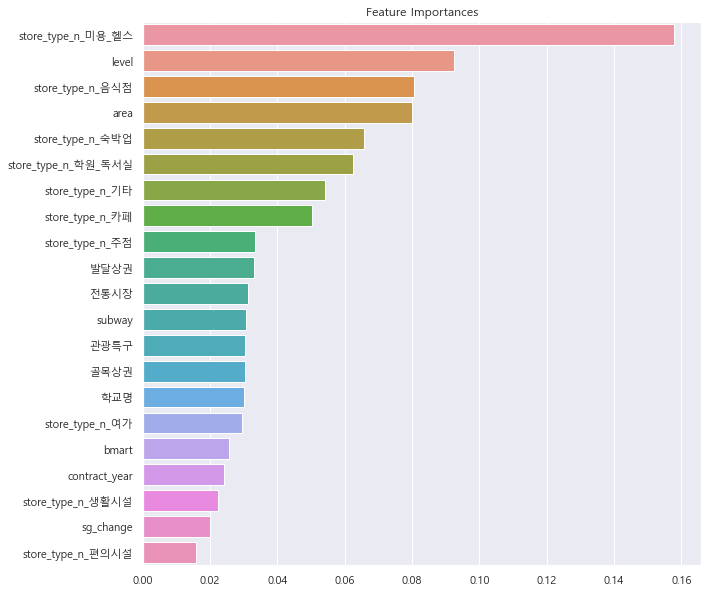

In [229]:
xgb_importances_values = xgb.feature_importances_
xgb_importances = pd.Series(xgb_importances_values, index =x_train_1_t.columns)
xgb_top = xgb_importances.sort_values(ascending=False)
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
sns.barplot(x=xgb_top, y=xgb_top.index)
plt.show()

In [238]:
pd.DataFrame(xgb_top)

,0
store_type_n_미용_헬스,0.157927
level,0.092467
store_type_n_음식점,0.080597
area,0.079844
store_type_n_숙박업,0.065863
store_type_n_학원_독서실,0.062548
store_type_n_기타,0.054176
store_type_n_카페,0.050236
store_type_n_주점,0.033405
발달상권,0.032950


In [239]:
x_train_1_t.columns

Index(['level', 'area', 'contract_year', 'bmart', '골목상권', '관광특구', '발달상권',
       '전통시장', 'subway', 'sg_change', '학교명', 'store_type_n_기타',
       'store_type_n_미용_헬스', 'store_type_n_생활시설', 'store_type_n_숙박업',
       'store_type_n_여가', 'store_type_n_음식점', 'store_type_n_주점',
       'store_type_n_카페', 'store_type_n_편의시설', 'store_type_n_학원_독서실'],
      dtype='object')

In [169]:
data_7_trans

,level,area,goodwill,sale_price,contract_year,bmart,골목상권,관광특구,발달상권,전통시장,...,store_type_n_기타,store_type_n_미용_헬스,store_type_n_생활시설,store_type_n_숙박업,store_type_n_여가,store_type_n_음식점,store_type_n_주점,store_type_n_카페,store_type_n_편의시설,store_type_n_학원_독서실
0,1,187.07,3200,4200,5,0,16,0,0,7,...,0,0,0,0,1,0,0,0,0,0
1,1,29.75,3000,6000,5,0,7,0,2,2,...,0,1,0,0,0,0,0,0,0,0
2,1,42.98,7000,8000,5,1,16,0,1,4,...,0,0,0,0,0,1,0,0,0,0
3,1,99.17,8000,13000,5,1,9,0,7,2,...,0,0,0,0,0,0,0,1,0,0
4,1,181.82,2000,4000,5,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16327,2,66.00,3000,6000,1,1,16,0,1,4,...,0,1,0,0,0,0,0,0,0,0
16328,-1,23.00,1300,3300,1,1,6,0,4,4,...,0,0,0,0,0,1,0,0,0,0
16329,3,43.00,3000,4000,1,3,9,0,7,2,...,0,1,0,0,0,0,0,0,0,0
16330,-1,132.00,3000,8000,1,2,11,0,0,6,...,0,0,0,0,0,1,0,0,0,0


## 시각화

In [171]:
viz_data = removeOutliers(data_7_t, 'area')
viz_data = removeOutliers(viz_data, 'goodwill')
viz_data = removeOutliers(viz_data, 'level')
viz_data = removeOutliers(viz_data, 'contract_year')
viz_data = removeOutliers(viz_data, 'bmart')
viz_data = removeOutliers(viz_data, 'subway')
viz_data = removeOutliers(viz_data, '학교명')
viz_data

,level,area,goodwill,sale_price,contract_year,bmart,골목상권,관광특구,발달상권,전통시장,subway,sg_change,학교명,store_type_n
0,1,187.07,3200,4200,5,0,16,0,0,7,0,0,0,여가
1,1,29.75,3000,6000,5,0,7,0,2,2,4,0,3,미용_헬스
2,1,42.98,7000,8000,5,1,16,0,1,4,3,0,1,음식점
3,1,99.17,8000,13000,5,1,9,0,7,2,7,0,1,카페
4,1,181.82,2000,4000,5,0,1,0,0,0,0,0,7,음식점
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16327,2,66.00,3000,6000,1,1,16,0,1,4,3,0,1,미용_헬스
16328,-1,23.00,1300,3300,1,1,6,0,4,4,1,0,3,음식점
16329,3,43.00,3000,4000,1,3,9,0,7,2,7,0,1,미용_헬스
16330,-1,132.00,3000,8000,1,2,11,0,0,6,3,0,3,음식점


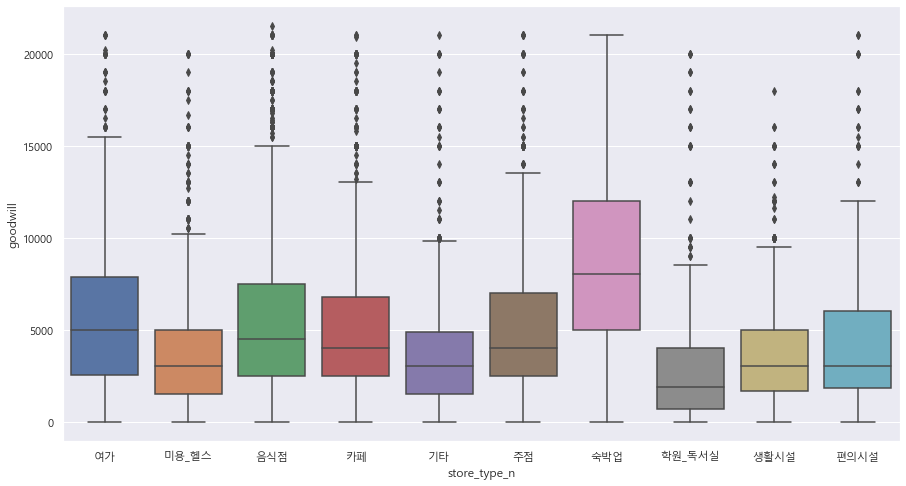

In [202]:
sns.boxplot(x='store_type_n',y= 'goodwill', data = viz_data )
sns.set(rc = {'figure.figsize':(15,15)})

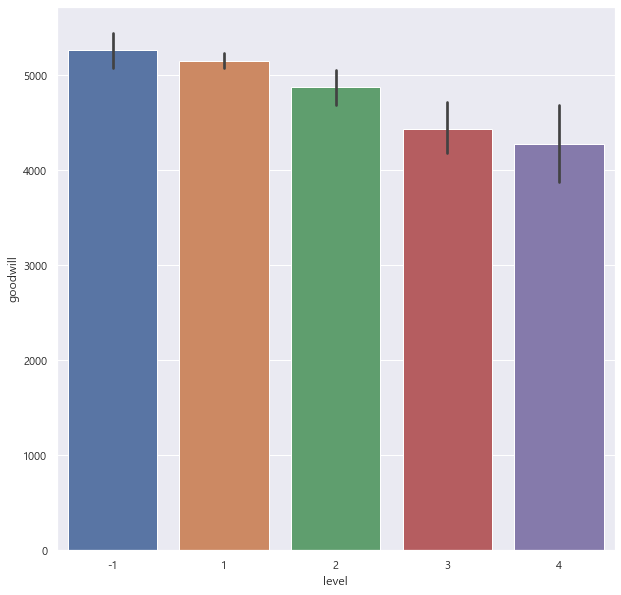

In [236]:
plt.figure(figsize=(10,10))
sns.barplot(x=viz_data.level,y=viz_data.goodwill)
plt.show()